In [1]:
from pybrain.datasets import UnsupervisedDataSet,SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer,SigmoidLayer,LinearLayer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x=np.arange(300)/10
y=(np.arange(300)/10)*3
z=(x+3)**2+50+14*y

In [12]:
dsCalib=SupervisedDataSet(2,1)

for p1,p2,res in zip(x,y,z):
    dsCalib.addSample((n,v1,v2,t),(res,))

In [27]:
# print(dsCalib)

In [20]:
#Crear la red
net=buildNetwork(2,2,1,bias=True,hiddenclass=TanhLayer)

net.reset

trainer=BackpropTrainer(net,dsCalib)

In [21]:
iters=500
errors,activacion=[],[]
PesosEvol,BiasEvol=np.zeros((iters,4)),np.zeros((iters,3))
for j in range (iters):
    errors.append(trainer.train())
    activacion.append(net.activateOnDataset(dsCalib))
    Pesos,Bias=[],[]
    for i in net.modules:
        if i.name!="bias":
            for c in net.connections[i]:
                Pesos.append(c.params)
        else:
            for c in net.connections[i]:
                Bias.append(c.params)
#     Pesos=np.array(Pesos).reshape(4)
#     Bias =np.array(np.concatenate(Bias,axis=0)).reshape(3)
#     PesosEvol[j,:]=Pesos
#     BiasEvol[j,:]=Bias
    

In [22]:
for mod in net.modules:
    print("Module",mod.name)
    if mod.paramdim>0:
        print("--parameters:",mod.params)
    for conn in net.connections[mod]:
        print("--connection to",conn.outmod.name)
        if conn.paramdim>0:
            print("-parameters",conn.params)

Module hidden0
--connection to out
-parameters [320.69794418 -40.44188994]
Module bias
--connection to out
-parameters [638.40053302]
--connection to hidden0
-parameters [  19.57990909 -267.78702041]
Module in
--connection to hidden0
-parameters [ 0.09642292  1.11165617 -0.13502297  0.92020295]
Module out


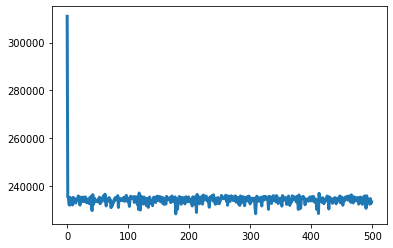

In [23]:
plt.plot(errors,lw=3)

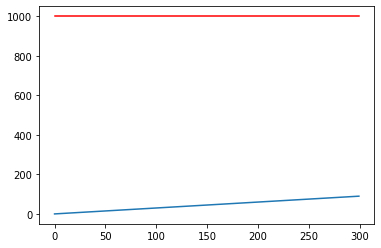

In [33]:
net_sim=net.activateOnDataset(dsCalib)
plt.plot(y)
plt.plot(net_sim,c='r')

## Reescalamiento

Es importante el reescalamiento porque a veces la red no podrá captar fluctuaciones muy grandes

In [45]:
x_esc=5*((x/np.max(abs(x))*2)-1)
y_esc=5*((y/np.max(abs(y))*2)-1)
z_esc=5*((z/np.max(abs(z))*2)-1)

In [46]:
dsCalib2=SupervisedDataSet(2,1)

for p1,p2,res in zip(x_esc,y_esc,z_esc):
    dsCalib2.addSample((p1,p2),(res,))

In [47]:
#Crear la red
net2=buildNetwork(2,2,1,bias=True,hiddenclass=TanhLayer)

net2.reset

trainer2=BackpropTrainer(net2,dsCalib2)

In [51]:
iters=500
errors,activacion=[],[]
PesosEvol,BiasEvol=np.zeros((iters,4)),np.zeros((iters,3))
for j in range (iters):
    errors.append(trainer2.train())
    activacion.append(net2.activateOnDataset(dsCalib))
    Pesos,Bias=[],[]
    for i in net2.modules:
        if i.name!="bias":
            for c in net2.connections[i]:
                Pesos.append(c.params)
        else:
            for c in net2.connections[i]:
                Bias.append(c.params)
#     Pesos=np.array(Pesos).reshape(4)
#     Bias =np.array(np.concatenate(Bias,axis=0)).reshape(3)
#     PesosEvol[j,:]=Pesos
#     BiasEvol[j,:]=Bias
    

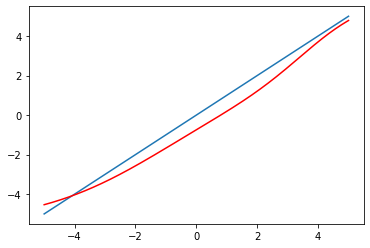

In [57]:
net_sim2=net2.activateOnDataset(dsCalib2)
plt.plot(x_esc,y_esc)
plt.plot(x_esc,net_sim2,c='r')

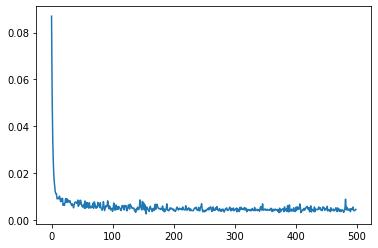

In [58]:
plt.plot(errors)

In [81]:
serie=np.array([1,2,3,4,np.nan,6])

In [82]:
ind=np.where(np.isnan(serie)==False)[0]

In [83]:
ind

array([0, 1, 2, 3, 5])

In [84]:
serie[ind]

array([1., 2., 3., 4., 6.])

In [86]:
serie = np.ones(len(serie))*np.nan
serie
serie[ind] =pc_obtenida

array([nan, nan, nan, nan, nan, nan])

In [87]:
class PybrainNNVisualizer():
    def __init__(self, neural_network):
        """
        :type neural_network: Network
        """
        self.neural_network = neural_network

    def draw(self):
        widest_layer = max([layer.dim for layer in self.neural_network.modules])
        network = NeuralNetwork(widest_layer)
        for layer in self.neural_network.modulesSorted:
            if type(layer) is BiasUnit:
                continue
            network.add_layer(layer.dim)
        network.draw()

In [2]:
fnn = buildNetwork(4, 8, 1)

PybrainNNVisualizer(fnn).draw()


NameError: name 'buildNetwork' is not defined

In [1]:
from matplotlib import pyplot
from math import cos, sin, atan

from pybrain import BiasUnit
from pybrain.structure.networks.network import Network


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (
                self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment),
                             (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)
        pyplot.text(x_text, self.y, '1', fontsize=12)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw(self.neuron_radius)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize=12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize=12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer ' + str(layerType), fontsize=12)


class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i == len(self.layers) - 1:
                i = -1
            layer.draw(i)
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title('Neural Network architecture', fontsize=15)
        pyplot.show()


class NNVisualizer():
    def __init__(self, neural_network):
        self.neural_network = neural_network

    def draw(self):
        widest_layer = max(self.neural_network)
        network = NeuralNetwork(widest_layer)
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()


class PybrainNNVisualizer():
    def __init__(self, neural_network):
        """
        :type neural_network: Network
        """
        self.neural_network = neural_network

    def draw(self):
        widest_layer = max([layer.dim for layer in self.neural_network.modules])
        network = NeuralNetwork(widest_layer)
        for layer in self.neural_network.modulesSorted:
            if type(layer) is BiasUnit:
                continue
            network.add_layer(layer.dim)
        network.draw()

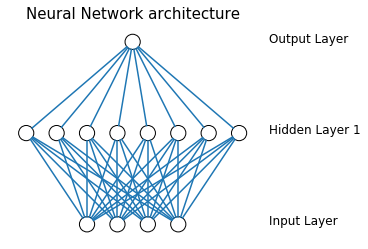

In [92]:
fnn = buildNetwork(4, 8, 1)

PybrainNNVisualizer(fnn).draw()